[Link to video (part 1)](https://youtu.be/WfVnhpM_flQ)

## Image inpainting

Inpainting is the act of replacing damaged portions of a picture with best guess portions, given the statistical properties of the rest of the image. 

[Here is very brief demonstration](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_photo/py_inpainting/py_inpainting.html#inpainting)

--2019-08-06 11:47:51--  https://docs.opencv.org/3.3.1/inpaint_result.jpg
Resolving docs.opencv.org (docs.opencv.org)... 207.38.86.214, 2605:de00:1:1:4a:39:0:7
Connecting to docs.opencv.org (docs.opencv.org)|207.38.86.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24459 (24K) [image/jpeg]
Saving to: ‘inpaint_result.jpg.15’

inpaint_result.jpg. 100%[===================>]  23.89K  --.-KB/s    in 0s      

2019-08-06 11:47:52 (244 MB/s) - ‘inpaint_result.jpg.15’ saved [24459/24459]



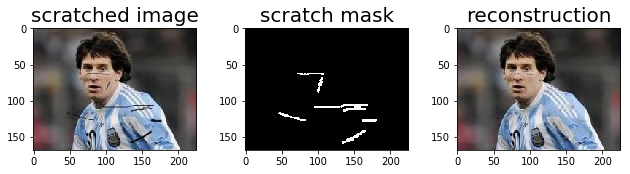

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


# get the example image and cut it up
!wget https://docs.opencv.org/3.3.1/inpaint_result.jpg
img_full = cv2.imread('inpaint_result.jpg')
vert_middle=round(img_full.shape[0]/2)
hori_middle=round(img_full.shape[1]/2)

img_scratched=img_full[:vert_middle,:hori_middle,:]
scratch_mask=img_full[:vert_middle,hori_middle:,:]
scratch_mask = cv2.cvtColor(scratch_mask, cv2.COLOR_RGB2GRAY)  
scratch_mask=cv2.threshold(scratch_mask,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
scratch_mask=scratch_mask[1]


dst = cv2.inpaint(img_scratched,scratch_mask,3,cv2.INPAINT_TELEA)

fig, axes = plt.subplots(nrows=1, ncols=3)
ax0, ax1, ax2 = axes
ax0.imshow(img_scratched[:,:,::-1])
ax0.set_title('scratched image',fontsize=20)
ax1.imshow(scratch_mask,cmap='gray')
ax1.set_title('scratch mask',fontsize=20)
ax2.imshow(dst[:,:,::-1])
ax2.set_title('reconstruction',fontsize=20)

plt.tight_layout()
fig.set_size_inches(10, 9)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

## Exposure fusion 

Can't get a single good image that has all the details you need? For example, with a narrow aperature a microscope may be able to resolve some features while others are too dark, but widening the aperature to the point you can see the missing details washes out the first set of details. With exposure fusion you can take multiple pictures at different settings and combine them into one image with all the necessary details. 

[Here is long tutorial with code and explanations](https://www.learnopencv.com/exposure-fusion-using-opencv-cpp-python/)

In [0]:
!wget -O arch_3.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/StLouisArchMultExpEV%2B1.18.JPG/800px-StLouisArchMultExpEV%2B1.18.JPG
!wget -O arch_2.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/8/89/StLouisArchMultExpEV%2B1.51.JPG/800px-StLouisArchMultExpEV%2B1.51.JPG
!wget -O arch_1.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/8/8f/StLouisArchMultExpEV%2B4.09.JPG/800px-StLouisArchMultExpEV%2B4.09.JPG
!wget -O arch_4.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/StLouisArchMultExpEV-1.82.JPG/800px-StLouisArchMultExpEV-1.82.JPG
!wget -O arch_5.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/StLouisArchMultExpEV-4.72.JPG/800px-StLouisArchMultExpEV-4.72.JPG



--2019-08-06 12:26:49--  https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/StLouisArchMultExpEV%2B1.18.JPG/800px-StLouisArchMultExpEV%2B1.18.JPG
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99770 (97K) [image/jpeg]
Saving to: ‘arch_3.jpg’

arch_3.jpg          100%[===================>]  97.43K   626KB/s    in 0.2s    

2019-08-06 12:26:50 (626 KB/s) - ‘arch_3.jpg’ saved [99770/99770]

--2019-08-06 12:26:50--  https://upload.wikimedia.org/wikipedia/commons/thumb/8/89/StLouisArchMultExpEV%2B1.51.JPG/800px-StLouisArchMultExpEV%2B1.51.JPG
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82110 (80K) [i

In [0]:
filenames = [
           "arch_1.jpg",
           "arch_2.jpg",
           "arch_3.jpg",
           "arch_4.jpg",
           "arch_5.jpg"
           ]

images = []
for filename in filenames:
  im = cv2.imread(filename)
  images.append(im)

In [0]:
# Align input images
from copy import deepcopy
alignMTB = cv2.createAlignMTB()
alignMTB.process(deepcopy(images), images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


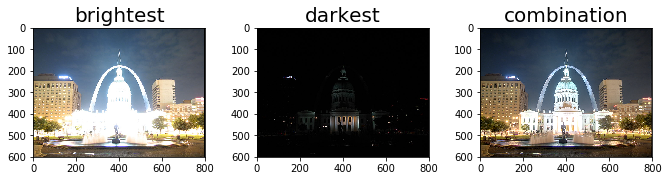

In [0]:
mergeMertens = cv2.createMergeMertens()
exposureFusion = mergeMertens.process(images)

fig, axes = plt.subplots(nrows=1, ncols=3)
ax0, ax1, ax2 = axes
ax0.imshow(images[0][:,:,::-1])
ax0.set_title('brightest',fontsize=20)
ax1.imshow(images[-1][:,:,::-1])
ax1.set_title('darkest',fontsize=20)
ax2.imshow(exposureFusion[:,:,::-1])
ax2.set_title('combination',fontsize=20)

plt.tight_layout()
fig.set_size_inches(10, 9)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)


## Image denoising by the use of patches

Do you have a set of images, many of them are good but some are bad?
Having studied many good images and gathered data about the features that are present, you can use that data to clean up corrupted images. Learning the features (image patches or wavelets) present is called "dictionary learning". Often a denoising operator is just a plain-old filter, it uses no prior knowledge (maybe just the point-spread-function). Once you have a dictionary you can create a denoising operator and limit it to constructing itself using only the features in the dictionary. Incidentally, because each new image can be described in terms of the dictionary this is also a very sparse and efficient code and enables the use of compressed sensing in applications where the data would not work if you simply used fourier transforms (as in the example).

[A poorly exposited, but complete, tutorial on image reconstruction with dictionary learning](https://scikit-learn.org/stable/auto_examples/decomposition/plot_image_denoising.html#sphx-glr-auto-examples-decomposition-plot-image-denoising-py)

In [0]:
from time import time
import scipy as sp

from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.feature_extraction.image import reconstruct_from_patches_2d


try:  # SciPy >= 0.16 have face in misc
    from scipy.misc import face
    face = face(gray=True)
except ImportError:
    face = sp.face(gray=True)

In [0]:
# Convert from uint8 representation with values between 0 and 255 to
# a floating point representation with values between 0 and 1.
face = face / 255.

# downsample for higher speed
face = face[::4, ::4] + face[1::4, ::4] + face[::4, 1::4] + face[1::4, 1::4]
face /= 4.0
height, width = face.shape

# Distort the right half of the image
print('Distorting image...')
distorted = face.copy()
distorted[:, width // 2:] += 0.075 * np.random.randn(height, width // 2)

Distorting image...


In [0]:
# Extract all reference patches from the left half of the image
print('Extracting reference patches...')
t0 = time()
patch_size = (7, 7)
data = extract_patches_2d(distorted[:, :width // 2], patch_size) 
data = data.reshape(data.shape[0], -1)
data -= np.mean(data, axis=0)
data /= np.std(data, axis=0)
print('done in %.2fs.' % (time() - t0))

# Extract noisy patches from the right side of the image

print('Extracting noisy patches... ')
t0 = time()
noisy_data = extract_patches_2d(distorted[:, width // 2:], patch_size)
noisy_data = noisy_data.reshape(noisy_data.shape[0], -1)
intercept = np.mean(noisy_data, axis=0)
noisy_data -= intercept
print('done in %.2fs.' % (time() - t0))

Extracting reference patches...
done in 0.02s.
Extracting noisy patches... 
done in 0.01s.


In [0]:
print(distorted.shape)
print((distorted.shape[0]/7)*(distorted.shape[1]/7))
print(data.shape)

(192, 256)
1003.1020408163264
(22692, 49)


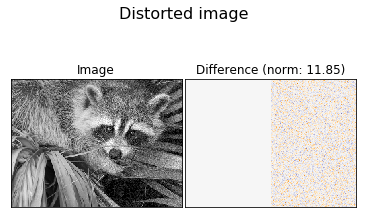

In [0]:
# #############################################################################
# Display the distorted image

def show_with_diff(image, reference, title):
    """Helper function to display denoising"""
    plt.figure(figsize=(5, 3.3))
    plt.subplot(1, 2, 1)
    plt.title('Image')
    plt.imshow(image, vmin=0, vmax=1, cmap=plt.cm.gray,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
    plt.subplot(1, 2, 2)
    difference = image - reference

    plt.title('Difference (norm: %.2f)' % np.sqrt(np.sum(difference ** 2)))
    plt.imshow(difference, vmin=-0.5, vmax=0.5, cmap=plt.cm.PuOr,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
    plt.suptitle(title, size=16)
    plt.subplots_adjust(0.02, 0.02, 0.98, 0.79, 0.02, 0.2)

show_with_diff(distorted, face, 'Distorted image')

Learning the dictionary...
done in 4.67s.
(100, 49)


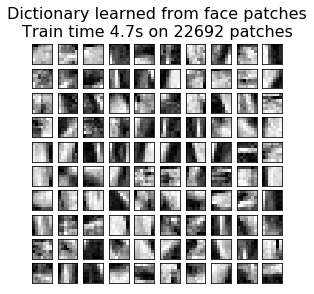

In [0]:

# #############################################################################
# Learn the dictionary from reference patches

print('Learning the dictionary...')
t0 = time()
dico = MiniBatchDictionaryLearning(n_components=100, alpha=1, n_iter=500)
V = dico.fit(data).components_
dt = time() - t0
print('done in %.2fs.' % dt)

plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(V[:100]):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape(patch_size), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('Dictionary learned from face patches\n' +
             'Train time %.1fs on %d patches' % (dt, len(data)),
             fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

print(V.shape)

Given the input dataset $X = [x_1, ..., x_K], x_i \in \mathbb{R}^d$ we wish to find a dictionary $\mathbf{D} \in \mathbb{R}^{d \times n}: D = [d_1, ..., d_n]$ and a representation $R = [r_1,...,r_K], r_i \in \mathbb{R}^n$ such that both $\|X-\mathbf{D}R\|^2_F$ is minimized and the representations $r_i$ are sparse enough. This can be formulated as the following optimization problem:

$\underset{\mathbf{D} \in \mathcal{C}, r_i \in \mathbb{R}^n}{\text{argmin}} \sum_{i=1}^K\|x_i-\mathbf{D}r_i\|_2^2+\lambda \|r_i\|_0$, where $\mathcal{C} \equiv \{\mathbf{D} \in \mathbb{R}^{d \times n}: \|d_i\|_2 \leq 1 \,\, \forall i =1,...,n \}$, $\lambda>0$

Orthogonal Matching Pursuit
1 atom...
done in 1.41s.
Orthogonal Matching Pursuit
2 atoms...
done in 2.68s.
Least-angle regression
5 atoms...
done in 21.13s.
Thresholding
 alpha=0.1...
done in 0.25s.


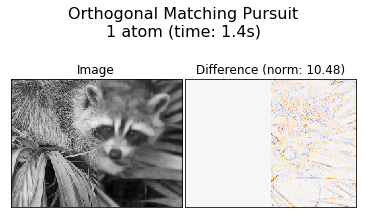

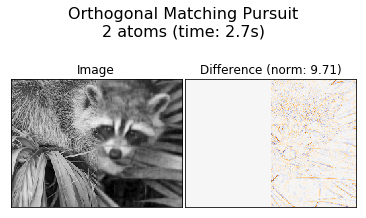

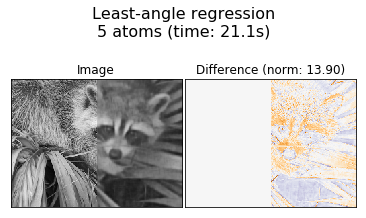

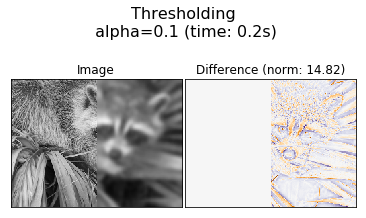

In [0]:
# #############################################################################
# reconstruct right side of the image using the dictionary

transform_algorithms = [
    ('Orthogonal Matching Pursuit\n1 atom', 'omp',
     {'transform_n_nonzero_coefs': 1}),
    ('Orthogonal Matching Pursuit\n2 atoms', 'omp',
     {'transform_n_nonzero_coefs': 2}),
    ('Least-angle regression\n5 atoms', 'lars',
     {'transform_n_nonzero_coefs': 5}),
    ('Thresholding\n alpha=0.1', 'threshold', {'transform_alpha': .1})]

reconstructions = {}
for title, transform_algorithm, kwargs in transform_algorithms:
    print(title + '...')
    reconstructions[title] = face.copy()
    t0 = time()
    dico.set_params(transform_algorithm=transform_algorithm, **kwargs)
    code = dico.transform(noisy_data)
    patches = np.dot(code, V)

    patches += intercept
    patches = patches.reshape(len(noisy_data), *patch_size)
    if transform_algorithm == 'threshold':
        patches -= patches.min()
        patches /= patches.max()
    reconstructions[title][:, width // 2:] = reconstruct_from_patches_2d(
        patches, (height, width // 2))
    dt = time() - t0
    print('done in %.2fs.' % dt)
    show_with_diff(reconstructions[title], face,
                   title + ' (time: %.1fs)' % dt)